# ADA BOOST ON IRIS DATASET

## Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## Loading the dataset

In [6]:
dataset=load_iris()
data=pd.DataFrame(dataset.data)
data.columns=dataset.feature_names
data['species']=dataset.target

## Seeing the dataset

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Seeing the size and shape of the dataset


In [8]:
print(data.shape)
print(data.size)

(150, 5)
750


## Visualising the relationship between different features in dataset

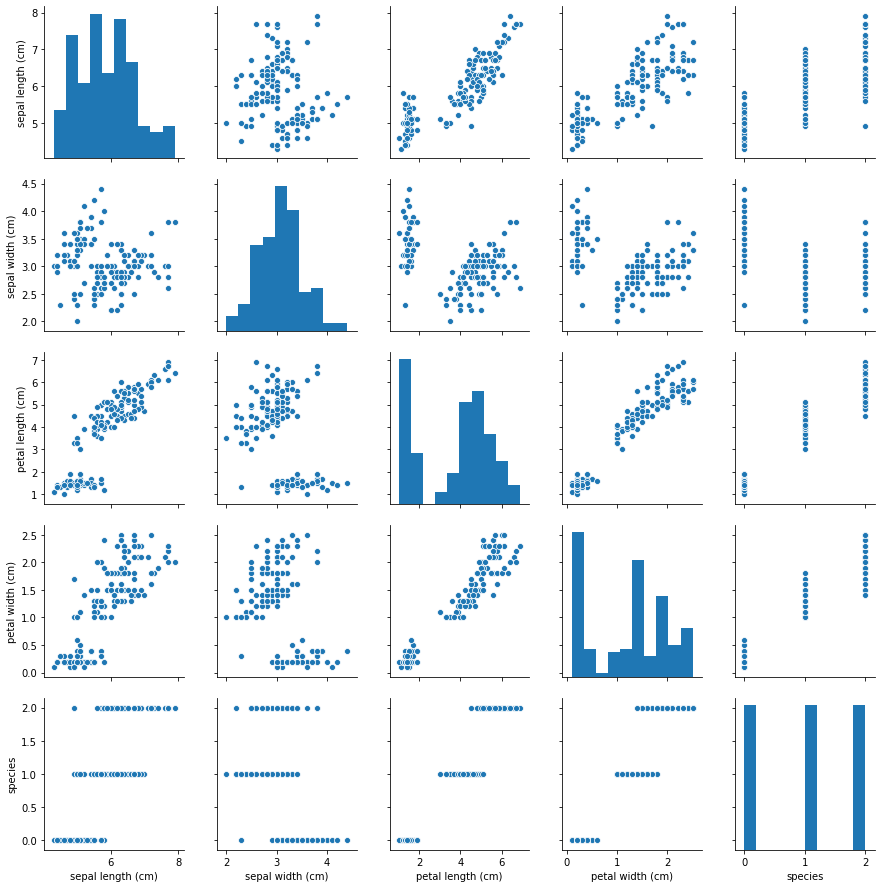

In [9]:
sns.pairplot(data)

## Heatmap

[]

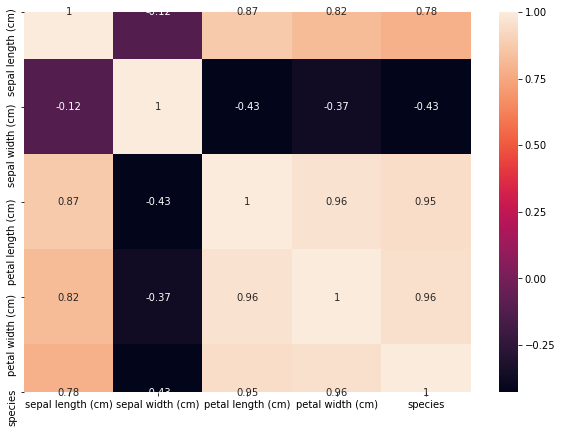

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.plot()

## Visualising the Violin Plot:-

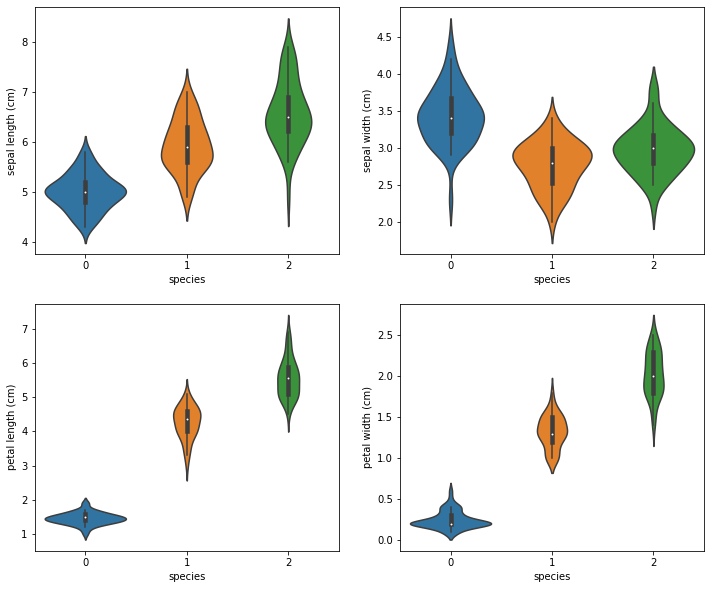

In [11]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal length (cm)',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal width (cm)',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal length (cm)',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal width (cm)',data=data)

## Breaking the dataset into features and the target variables

In [12]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

## Dividing the data into train and test

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


## Training the model using Decision Tree as base estimator

In [14]:
from sklearn.ensemble import AdaBoostClassifier

model=AdaBoostClassifier(n_estimators=50,learning_rate=1)

model.fit(x_train,y_train)

y_predict=model.predict(x_test)


## Evaluating the performance of the model

In [15]:
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,y_predict)

print(confusion)

print(model.score(x_test,y_test))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
0.9666666666666667


## Using SVC as a base estimator building a model

In [16]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

svc=SVC(probability=True,kernel='linear')

model=AdaBoostClassifier(n_estimators=50,base_estimator=svc,learning_rate=1)

model.fit(x_train,y_train)

y_predict=model.predict(x_test)

## Evaluating the performance of model

In [17]:
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,y_predict)

print(confusion)

print(model.score(x_test,y_test))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
1.0
